## Day 18 - Lava pits

**Part 1: Just draw the lava pit based on instructions and say how much lava fit in it**

In [58]:
with open("./example.txt") as f:
    example_lines = [line.strip() for line in f.readlines()]

with open("./input.txt") as f:
    input_lines = [line.strip() for line in f.readlines()]

example_lines

['R 6 (#70c710)',
 'D 5 (#0dc571)',
 'L 2 (#5713f0)',
 'D 2 (#d2c081)',
 'R 2 (#59c680)',
 'D 2 (#411b91)',
 'L 5 (#8ceee2)',
 'U 2 (#caa173)',
 'L 1 (#1b58a2)',
 'U 2 (#caa171)',
 'R 2 (#7807d2)',
 'U 3 (#a77fa3)',
 'L 2 (#015232)',
 'U 2 (#7a21e3)']

In [59]:
import sys

sys.setrecursionlimit(int(1e9))

def flood_fill_recursive(y, x, grid: list[list[int]]):
    border_x = len(grid[0]) - 1
    border_y = len(grid) - 1

    saw_along_the_journey = set()

    some_dumb_list = []
    def lets_try_to_escape(y, x, the_dumb_list: list):
        """
        Using flood_fill idea to define if we can escape the grid?
        """
        
        if not (0 < y < border_y and 0 < x < border_x):
            # hit an edge!
            # tried to use a global bool here but was messing up
            if not grid[y][x]:
                the_dumb_list.append(True)
                return
        else:
            saw_along_the_journey.add((y, x))

        if (next_y:= y+1, next_x:= x) not in saw_along_the_journey:
            if not grid[next_y][next_x]:
                lets_try_to_escape(next_y, next_x, the_dumb_list)
        if (next_y:= y-1, next_x:= x) not in saw_along_the_journey:
            if not grid[next_y][next_x]:
                lets_try_to_escape(next_y, next_x, the_dumb_list)
        if (next_y:= y, next_x:= x+1) not in saw_along_the_journey:
            if not grid[next_y][next_x]:
                lets_try_to_escape(next_y, next_x, the_dumb_list)
        if (next_y:= y, next_x:= x-1) not in saw_along_the_journey:
            if not grid[next_y][next_x]:
                lets_try_to_escape(next_y, next_x, the_dumb_list)
    
    lets_try_to_escape(y, x, some_dumb_list)

    if True in some_dumb_list:
        return True, saw_along_the_journey
    else:
        return False, saw_along_the_journey

In [60]:
def build_grid_from_trenches(trenches: list[tuple[int, int]]) -> list[list[int]]:
    min_x = min(x for _,x in trenches)
    min_y = min(y for y,_ in trenches)
    max_x = max(x for _,x in trenches)
    max_y = max(y for y,_ in trenches)

    # Note: actual max index not like a python range upper bound
    grid = [[0 for _ in range(min_x, max_x+1)] for _ in range(min_y, max_y+1)]
    for ty, tx in trenches:
        # we should shift our grid so it starts at (0,0) else everything else I've been doing bloody breaks obviously!
        grid[ty+abs(min_y)][tx+abs(min_x)] = 1

    return grid

In [61]:
def part1(lines: list[str]) -> int:
    starting_position = (0,0)
    trenches = [starting_position]
    current_position = starting_position
    for line in lines:
        direction, dist, _ = line.split()  # Colour not used at least in part1
        dist = int(dist)
        current_y, current_x = current_position
        for _ in range(1, dist+1):
            if direction == "R":
                current_x += 1
            elif direction == "L":
                current_x -= 1
            elif direction == "U":
                current_y -= 1
            elif direction == "D":
                current_y += 1

            current_position = (current_y, current_x)
            trenches.append(current_position)

    grid = build_grid_from_trenches(trenches)

    non_borders_to_check = [
        (y,x)
        for y in range(len(grid))
        for x in range(len(grid[0]))
        if grid[y][x] != 1
    ]

    assert len(grid[0])*len(grid) == len(set(trenches)) + len(non_borders_to_check)

    while non_borders_to_check:
        y, x = non_borders_to_check.pop()
        escaped, saw_along_the_journey = flood_fill_recursive(y, x, grid)
        non_borders_to_check = [item for item in non_borders_to_check if item not in saw_along_the_journey]
        if not escaped:
            for saw_y, saw_x in saw_along_the_journey:
                grid[saw_y][saw_x] = 1

    flattened_grid = []
    for row in grid:
        flattened_grid.extend(row)

    return flattened_grid.count(1)

assert part1(example_lines) == 62
part1(input_lines)

45159

omg I did it

**Part 2: hexadecimal nonsense**

In [62]:
def get_corners(lines) -> list[tuple[int, int]]:
    corners = [(0,0)]
    for prev_idx, line in enumerate(lines):
        _, _, colour = line.split()  # Colour not used at least in part1
        hex_number = colour[2:7]
        direction = int(colour[-2])
        dist = int(hex_number, 16)

        # directions:
        # R = 0, D = 1, L = 2, U = 3
        # changing to thinking (x,y) and UP is an actual increase in y, and DOWN is a decrease
        # similarly RIGHT is an increase in x and LEFT is a decrease. So we're very much thinking of cartesian coordinates
        if direction == 0:
            corners.append(
                (corners[prev_idx][0]+dist, corners[prev_idx][1])
            )
        elif direction == 1:
            corners.append(
                (corners[prev_idx][0], corners[prev_idx][1]-dist)
            )
        elif direction == 2:
            corners.append(
                (corners[prev_idx][0]-dist, corners[prev_idx][1])
            )
        elif direction == 3:
            corners.append(
                (corners[prev_idx][0], corners[prev_idx][1]+dist)
            )
    
    # turns out dont need to make coordinates positive
    # min_x = min(x for x,y in corners)
    # min_y = min(y for x,y in corners)

    assert corners[0] == corners[-1]

    corners = [(x, y) for x,y in corners]

    return corners

corners = get_corners(example_lines)
print(corners)

[(0, 0), (461937, 0), (461937, -56407), (818608, -56407), (818608, -919647), (1186328, -919647), (1186328, -1186328), (609066, -1186328), (609066, -356353), (497056, -356353), (497056, -1186328), (5411, -1186328), (5411, -500254), (0, -500254), (0, 0)]


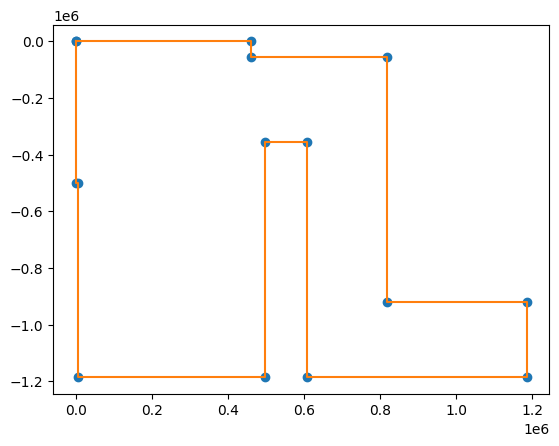

In [63]:
from matplotlib import pyplot as plt

x_arr = [x for x,y in corners]
y_arr = [y for x,y in corners]

plt.plot(x_arr, y_arr, "o")
plt.plot(x_arr, y_arr, "-")

In [66]:
from math import sqrt

def segments(p):
    return zip(p, p[1:] + [p[0]])

def area(corners):
    # K=1/2|(x1y2–x2y1)+(x2y3–x3y2)+⋯+(xn−1yn–xnyn−1)+(xny1–x1yn)|.
    corners = list(reversed(corners[:-1]))
    return (
        # 0.5 * abs(
            abs(
                    sum(x0*y1 - x1*y0
                    for ((x0, y0), (x1, y1)) in segments(corners))
        )
    )

def perimeter(corners):
    running_sum = 0
    for i in range(len(corners[:-1])):
        if i == len(corners) - 1:
            i_plus_one = 0
        else:
            i_plus_one = i + 1
        
        running_sum += sqrt((corners[i_plus_one][0] - corners[i][0])**2 + (corners[i_plus_one][1]-corners[i][1])**2)
    
    return running_sum

0.5*(abs(area(corners)) + perimeter(corners)) + 1

952408144115.0

In [68]:
def part2(lines: list[str]) -> int:
    """
    Going to have to tackle this a very different way, can't be building the grid like before....!


    idea: defining a shape, we have only straight edges, so if we just get all the "corners" from this input we have an outline of a shape

    """

    corners = get_corners(lines)
    # honestlyyyy not ENTIRELY sure about why the off by one. lol
    return 0.5*(abs(area(corners)) + perimeter(corners)) + 1


assert part2(example_lines) == 952408144115, part2(example_lines)
part2(input_lines)

134549294799713.0